# Statistiques Descriptives avec Python

In [1]:
import pandas as pd

In [3]:
# importer la base de données
df=pd.read_csv('weight-height-bmi.csv')
df.head(20)

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
5,Male,1.708227,69.042216,Normal
6,Male,1.747141,83.428219,Overweight
7,Male,1.736052,76.190352,Overweight
8,Male,1.702281,79.800187,Overweight
9,Male,1.611795,70.941642,Overweight


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   BMI     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


# Variable Qualitative

In [5]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<AxesSubplot:>

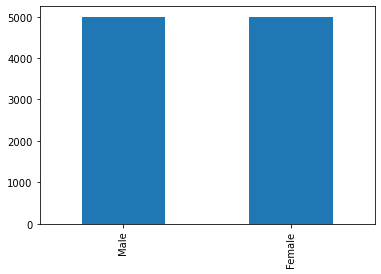

In [8]:
df['Gender'].value_counts().plot(kind='bar')

In [6]:
df['BMI'].value_counts()

Overweight     5589
Normal         4114
Obesity         255
Underweight      42
Name: BMI, dtype: int64

<AxesSubplot:>

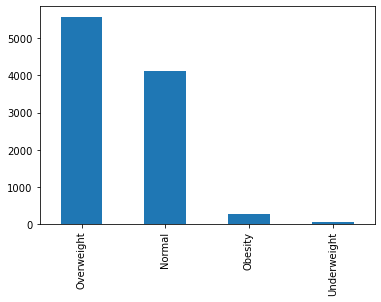

In [7]:
df['BMI'].value_counts().plot(kind='bar')

# Variable Quantitative

In [9]:
df['Height'].mean()

1.6857360177710958

In [10]:
df['Weight'].mean()

73.22805433651584

In [11]:
df['Weight'].max()

122.46516729999999

In [12]:
df['Weight'].min()

29.34745988

In [13]:
df['Weight'].median()

73.1248943

<AxesSubplot:ylabel='Frequency'>

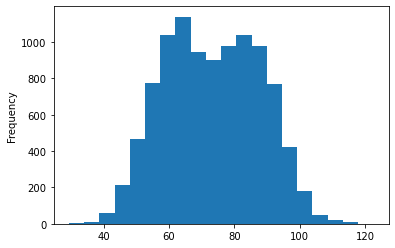

In [16]:
df['Weight'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

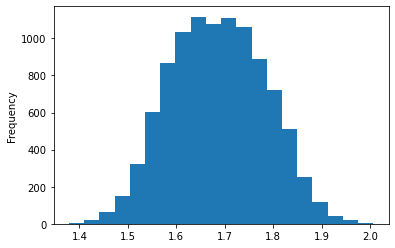

In [17]:
df['Height'].plot.hist(bins=20)

<AxesSubplot:>

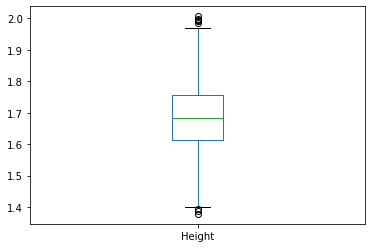

In [18]:
df['Height'].plot.box()

# Detection des valeurs abberantes (Outliers)

In [19]:
# On calcule les quartiles
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
coef = IQR*1.5

In [20]:
# On calcule les valeurs limite
lim_inf = Q1 - coef
lim_sup = Q3 + coef

In [21]:
# On cherche les outliers
result = df[(df['Height'] >  lim_sup) | (df['Height'] <  lim_inf)]
result

,Gender,Height,Weight,BMI
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
2014,Male,2.006568,122.465167,Obesity
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
9285,Female,1.378284,29.347460,Underweight


In [22]:
#filtre colonnes
result.sort_values("Height")

,Gender,Height,Weight,BMI
9285,Female,1.378284,29.347460,Underweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
2014,Male,2.006568,122.465167,Obesity


In [23]:
df=df[(df['Height'] <=  lim_sup) & (df['Height'] >=  lim_inf)]

<AxesSubplot:>

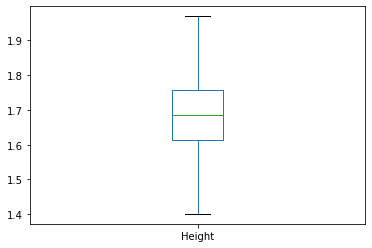

In [24]:
df['Height'].plot.box()

<AxesSubplot:ylabel='Frequency'>

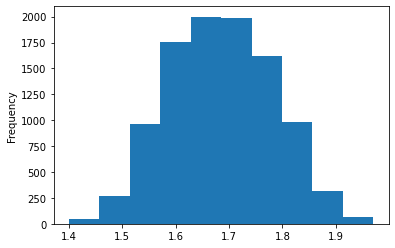

In [25]:
df['Height'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

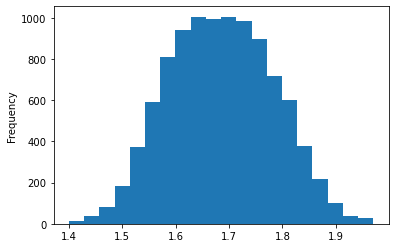

In [26]:
df['Height'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

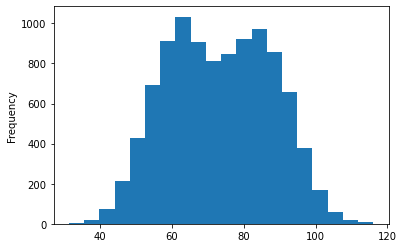

In [27]:
df['Weight'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

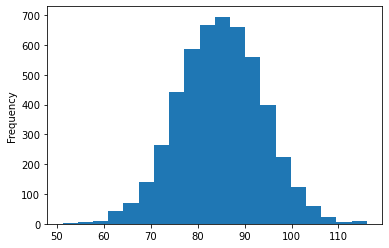

In [28]:
df_male=df[df['Gender']=='Male']
df_male['Weight'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

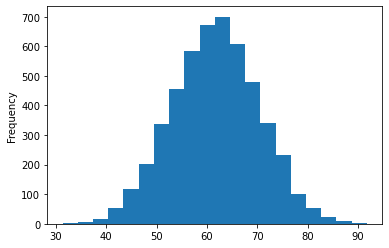

In [29]:
df_female=df[df['Gender']=='Female']
df_female['Weight'].plot.hist(bins=20)